# boundmass

boundmass module can be used to find the bound partilces given a SWIFTsim snapshot. 

In [5]:
%load_ext autoreload
%autoreload 2
from planetboundmass.boundmass import Bound
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


The module can handle both normal snapshot names and special snapshot names. If you are using a normal snapshot name, you will need to provide the number of particles in the initial target (npt) and the total mass of the system (in Earth mass).

To define how many remnants you are trying to find, use `num_rem`. This is a guess number, and the larger `num_rem` is, the slower the code will be because it will continue searching for unbound particles and trying to find a remnant with enough particles there. However, a small `num_rem` can also be problematic in some cases, since the lowest energy seed might not be the seed for the largest or second largest remnant. The default `num_rem` is 3, which is a safe choice for most cases. If you only want to find the largest remnant, then setting `num_rem=1` will be very fast, but you need to double-check if the code has found the real largest remnant.

Another parameter that can affect the final results is minibound. This parameter specifies the minimum number of particles that can be counted as remnants in the simulation. Depending on the resolution of your simulation, you may need to adjust this value. For high-resolution simulations, a larger minibound value is recommended. The default value of 2000 particles is typically sufficient for simulations with 1e5 particles.

Below is a hit and run simulation, and the snapshot is named snapshot_0002.hdf5, representing the simulation at the 2h simulation time. Here is just an example, in the real case, please always use snapshots at least after 10-15h simulation time.

## Bound class

In [6]:
loc = '/Users/qb20321/Desktop/SWIFTother/test_snap/hitnrun/snapshot_0002.hdf5'
normal_s = Bound(filename=loc, verbose=1, npt=103072, total_mass=0.21, num_rem=3)

not standard filename


## find_bound

start to find the bound particles, this is the core function.

In [12]:
normal_s.find_bound()

----------break------------
Bad seeds larger than the maximum allowed bad seeds
++++++++++++++++++++++++++++++++++++++++++++++
+ ALL BOUND MASS = 91.53 % total initial mass+
++++++++++++++++++++++++++++++++++++++++++++++


------------------------------------------
Remnant 1 mass = 0.11670 M⊕
Number of particles = 97103
Mass ratio = 55.57 %
ANEOS_forsterite ratio = 68.08 %
ANEOS_Fe85Si15 ratio = 31.92 %

------------------------------------------

Remnant 2 mass = 0.07551 M⊕
Number of particles = 65991
Mass ratio = 35.96 %
ANEOS_forsterite ratio = 65.66 %
ANEOS_Fe85Si15 ratio = 34.34 %

------------------------------------------



## attributes

The data related to the bound mass finding process will be stored in the Bound class object, and can be reused later for other purposes. The masses are all in units of Earth mass. In the array shown below, the first element is the value for the largest remnant, the second element for the second largest remnant, and so on.

In [35]:
print('Remnant mass array',normal_s.m_rem,'Earth mass')
print('Remnant mass ratio',normal_s.mass_ratio)
print('')
print('Element mass in each remnant ',normal_s.element_mass_array)
print('')
print('Element ratio in each remnant ',normal_s.element_ratio_array)
print('')
print('number of particles in each remnant',normal_s.num_par_rem)

Remnant mass array [0.11669965 0.07551129 0.        ] Earth mass
Remnant mass ratio [0.55571263 0.35957757 0.        ]

Element mass in each remnant  {'ANEOS_forsterite_mass': array([0.07945458, 0.04958399, 0.        ]), 'ANEOS_Fe85Si15_mass': array([0.03724507, 0.02592731, 0.        ])}

Element ratio in each remnant  {'ANEOS_forsterite_ratio': array([0.68084675, 0.65664333, 0.        ]), 'ANEOS_Fe85Si15_ratio': array([0.31915322, 0.34335667, 0.        ])}

number of particles in each remnant [97103 65991     0]


In [28]:
print('Alloy ratio in the second largest remnant is ',normal_s.element_ratio_array['ANEOS_Fe85Si15_ratio'][1])

Alloy ratio in the second largest remnant is  0.3433566689491272


## source_track

You can use `source_track` function to track in each remnant, how much of its material is from the target.

In [13]:
normal_s.source_track()

-----------------------------------------------------------------
In remnant 1, : ratio = 95.95 % ANEOS_forsterite is from target
In remnant 1, : ratio = 100.00 % ANEOS_Fe85Si15 is from target
-----------------------------------------------------------------
-----------------------------------------------------------------
In remnant 2, : ratio = 3.88 % ANEOS_forsterite is from target
In remnant 2, : ratio = 0.00 % ANEOS_Fe85Si15 is from target
-----------------------------------------------------------------


In [30]:
normal_s.element_target_ratio_array

{'ANEOS_forsterite_ratio_from_target': array([0.95946854, 0.03881252]),
 'ANEOS_Fe85Si15_ratio_from_target': array([1., 0.])}

## total_vap_fraction

You can use `total_vap_fraction` to check for all the particles in the snapshot, how much of core and mantle is vapourized.

In [28]:
normal_s.total_vap_fraction()

0.00 % of core vapourized
0.77 % of mantle vapourized


In [36]:
normal_s.core_vapour_fraction

4.021256745667934e-05

In [37]:
normal_s.mantle_vapour_fraction

0.007706685615553498

## rem_vap_fraction

You can use `rem_vap_fraction` to check how much of core and mantle is vapourized inside a remnant. You need to provide `rem_id`, the id of the remnant. `rem_id=1` is the largest remnant, `rem_id=2` is the second largest, and so on.

In [11]:
normal_s.rem_vap_fraction(rem_id=2)

In the remnant 2: 0.01 % of iron vapourized
In the remnant 2: 0.59 % of si vapourized


In [38]:
normal_s.rem_core_vapour_fraction

array([0.00000000e+00, 9.78808172e-05, 0.00000000e+00])

In [39]:
normal_s.rem_mantle_vapour_fraction

array([0.        , 0.00587171, 0.        ])

## write_bound_id

Write each particle's bound id to the same provided snapshot. This is useful when later plotting particles with Firefly.

In [56]:
normal_s.write_bound_id()

## basic_plot

`basic_plot` can be use to visualize the bound particles. It comes with three mode:


mode = -1 : only showing the particles of the largest remnant  

mode = 0 : showing all the remnant without showing unbound particles 


mode > 1 : showing the remant and all other particles with id of remnant the same as mode. So mode =1 will show the position of the largest remnant. Mode = 2 with show the position of the second largest remnant and so on.  

The default axis will have unequal aspect ratio, if you want to sent them to equal, use `equal_axis=True`.

You can use `extent=[xmin,xmax,ymin,ymax,zmin,zmax]` (in Earth radius) to provide the limit of each ticks.

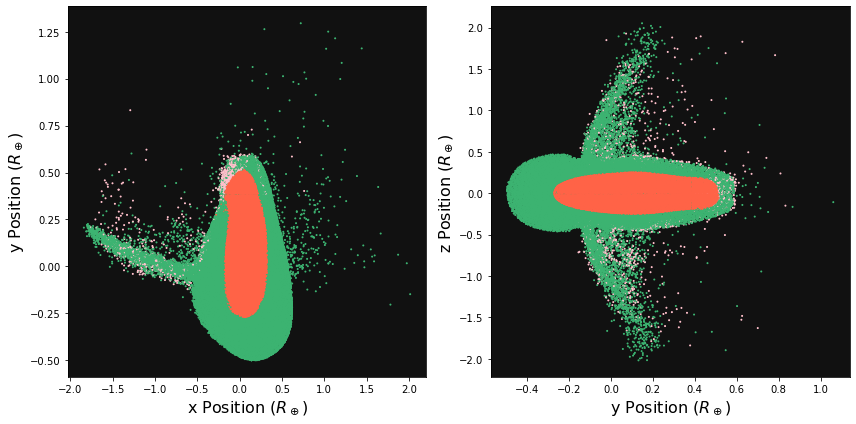

In [36]:
normal_s.basic_plot(mode=-1)

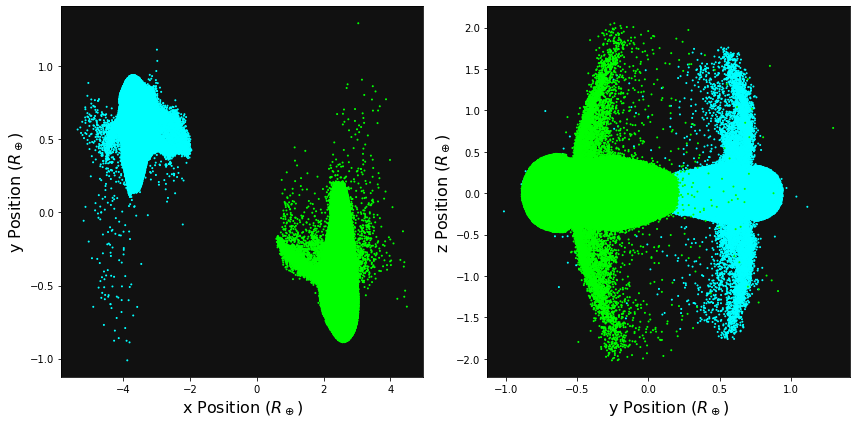

In [17]:
normal_s.basic_plot(mode=0)

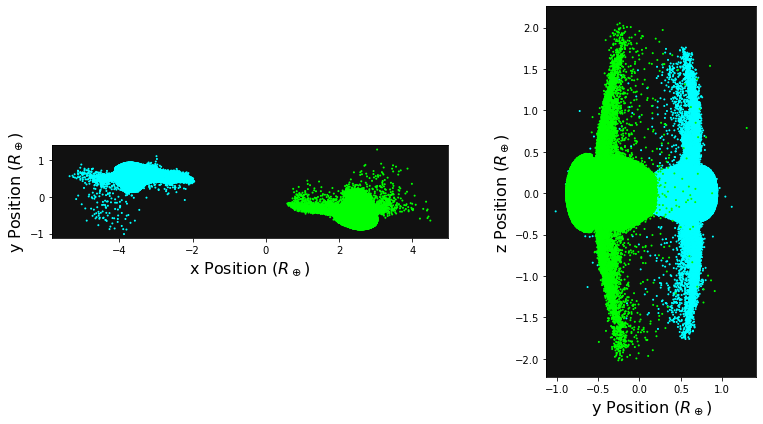

In [19]:
normal_s.basic_plot(mode=0,equal_axis=True)

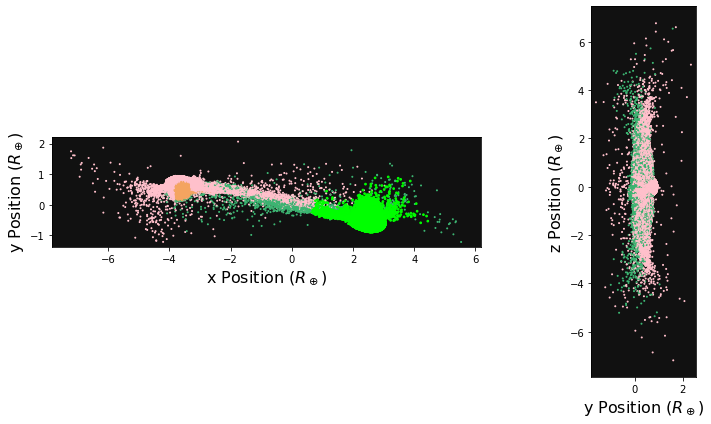

In [20]:
normal_s.basic_plot(mode=1,equal_axis=True)

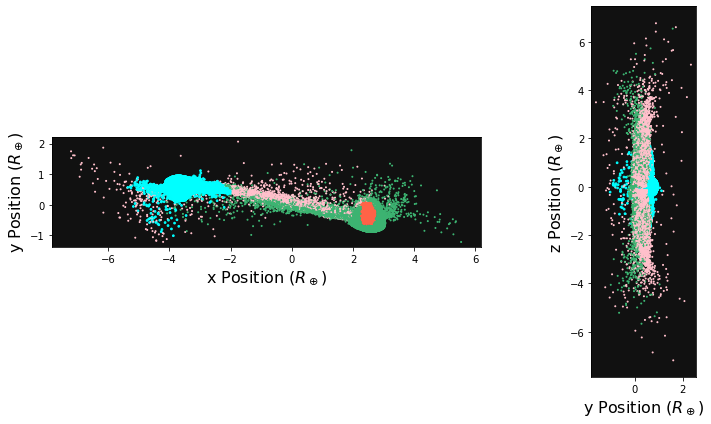

In [40]:
normal_s.basic_plot(mode=2,equal_axis=True)

change colour and size representation of different material particles scatter points.

Let's change the target mantle colour from 'mediumseagreen' to 'darkorchid'
Also, change the scatter points size of all mantle from the default 1 to smaller 0.1

In [52]:
# below is the default colour 

# normal_s.define_scatter_colour(
#         colour_iron_tar="tomato", # colour of the core from target
#         colour_si_tar="mediumseagreen", # colour of the mantle from target
#         colour_water_tar="skyblue", # colour of the water from the target
#         colour_atmos_tar="aliceblue", # colour of the atmosphere from the target
#         colour_iron_imp="sandybrown", # colour of x from the impactor
#         colour_si_imp="pink",
#         colour_water_imp="skyblue",
#         colour_atmos_imp="aliceblue",)
normal_s.define_scatter_colour(colour_si_tar='darkorchid')
normal_s.define_scatter_size(size_si=0.1)
normal_s.update_material_dictionary(update=True)

In [53]:
normal_s.colour_si_tar

'darkorchid'

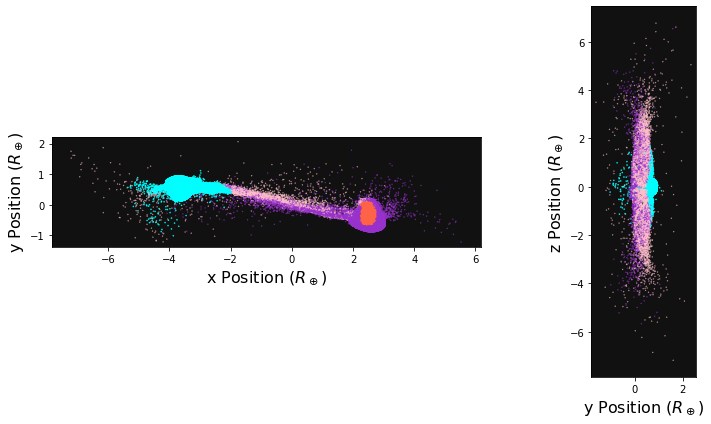

In [55]:
normal_s.basic_plot(mode=2,equal_axis=True)

# Example 2

A head-on impact that has multiple small remnants after the collision.

## all_in_one

The `all_in_one` function first runs the `find_bound` function, followed by the EDACM model function. It then collects all important information derived from the bound mass calculation and EDACM model, storing them as a Pandas series.

As the EDACM model requires the radius of the planet, you must provide snapshot locations of the target and impactor.

This function is particularly useful when dealing with a large number of final snapshots from various simulations. We recommend providing a special snapshot name when using `all_in_one` to ensure that all necessary information is collected.

In [62]:
loc_tar = '/Users/qb20321/Desktop/SWIFTother/test_snap/cooling/snapOUT_cooling_PLANETic_1d5842_npt173750_EXiNf.hdf5'
loc_imp = '/Users/qb20321/Desktop/SWIFTother/test_snap/cooling/snapOUT_cooling_PLANETic_1d5842_npt173750_EXiNf.hdf5'

loc = "/Users/qb20321/Desktop/SWIFTother/test_snap/snapOUT_PLANETimpact_0d0h_1d58085_npt173750_3d16170_v36d8387kms_b0d000_pX_EiEf.hdf5"

x = Bound(filename=loc, verbose=0, num_rem=5, minibound=2000)

d = x.all_in_one(loc_tar=loc_tar,loc_imp=loc_imp)

In [63]:
d

M_tar                            1.580851
M_total                          3.161702
gamma                                 1.0
npt                                173750
b                                     0.0
v                                 36.8387
hit_dir                                pX
attributes                           EiEf
m_lr                             0.338995
ratio_lr                         0.107219
Z_Fe_lr                          0.765108
np_lr                               37257
m_slr               [0.15757345551927585]
ratio_slr          [0.049838168010214005]
Z_Fe_slr             [0.7905219793319702]
np_slr                            [17318]
accretion_rate                  -0.785562
Q_R_norm                         1.950501
Q_RD_star_prime       869705827034.674316
Q_R                  1696362272112.500488
dtype: object

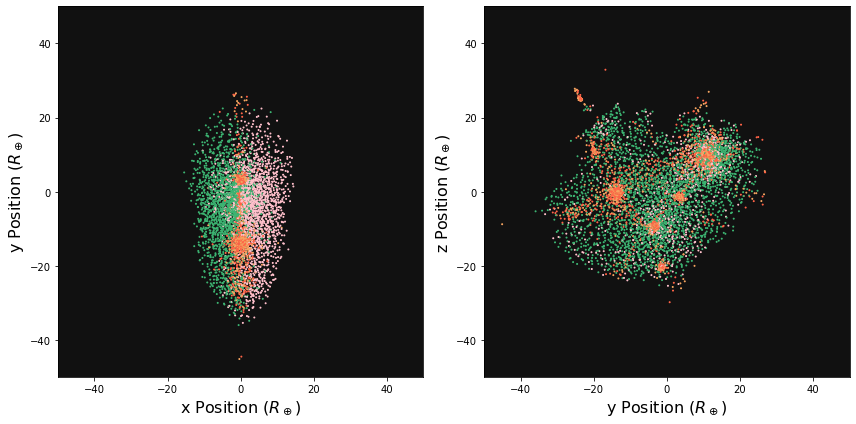

In [69]:
x.basic_plot(mode=-1,extent=[-50,50,-50,50,-50,50])

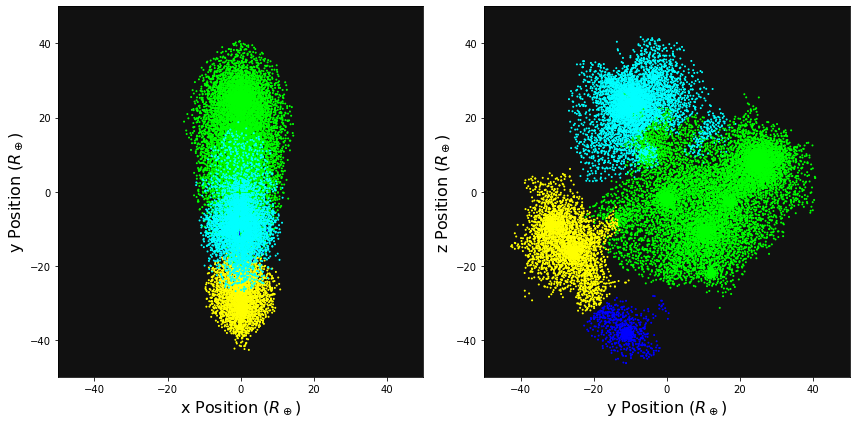

In [68]:
x.basic_plot(mode=0,extent=[-50,50,-50,50,-50,50])

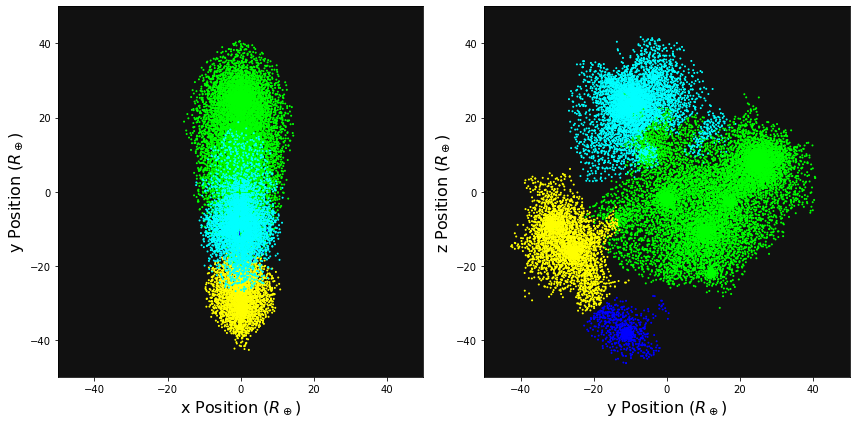

In [72]:
fig = plt.figure(figsize=(12,6))
fig = x.basic_plot(fig=fig,mode=0,extent=[-50,50,-50,50,-50,50])

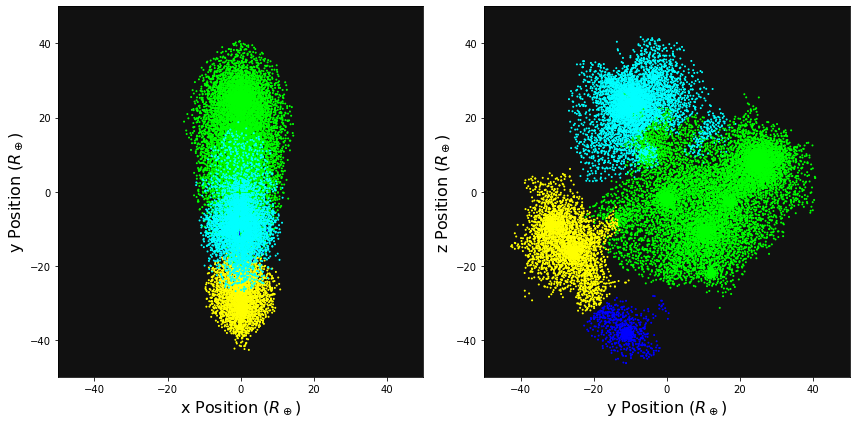

In [73]:
# save the figure
fig.savefig(saveloc)